# Assignment 2

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import os

## Task a)

In [74]:
# Splitting the data into train and test set
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=302)

columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Lat", "Long", "MedHouseVal"]
data = pd.DataFrame(data=np.column_stack((X_train, y_train)), columns=columns)

print("Size of the data:")
print(data.shape)

data.head()


Size of the data:
(15480, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Lat,Long,MedHouseVal
0,3.3409,32.0,3.254902,1.009804,177.0,1.735294,33.90,-118.37,2.563
1,4.0000,35.0,4.938095,0.985714,552.0,2.628571,37.71,-122.12,1.679
2,4.1997,17.0,5.732759,1.060345,2866.0,3.088362,38.66,-121.76,1.334
3,5.6163,27.0,6.515670,1.005698,1140.0,3.247863,33.83,-117.87,2.310
4,1.6559,48.0,5.161663,1.000000,1363.0,3.147806,33.99,-118.31,1.014


In [75]:
print("Structure of the data:")
print(data.describe())

Structure of the data:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  15480.000000  15480.000000  15480.000000  15480.000000  15480.000000   
mean       3.867932     28.634044      5.431607      1.095960   1421.528811   
std        1.899344     12.642321      2.388734      0.427406   1124.197972   
min        0.499900      1.000000      0.846154      0.375000      3.000000   
25%        2.565800     18.000000      4.443769      1.006118    787.000000   
50%        3.528800     29.000000      5.230702      1.048833   1163.000000   
75%        4.744150     37.000000      6.060497      1.099431   1719.250000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup           Lat          Long   MedHouseVal  
count  15480.000000  15480.000000  15480.000000  15480.000000  
mean       3.112156     35.634422   -119.569263      2.068206  
std       11.959223      2.138867      2.004747      1.156928  
min      

In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       15480 non-null  float64
 1   HouseAge     15480 non-null  float64
 2   AveRooms     15480 non-null  float64
 3   AveBedrms    15480 non-null  float64
 4   Population   15480 non-null  float64
 5   AveOccup     15480 non-null  float64
 6   Lat          15480 non-null  float64
 7   Long         15480 non-null  float64
 8   MedHouseVal  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB
None


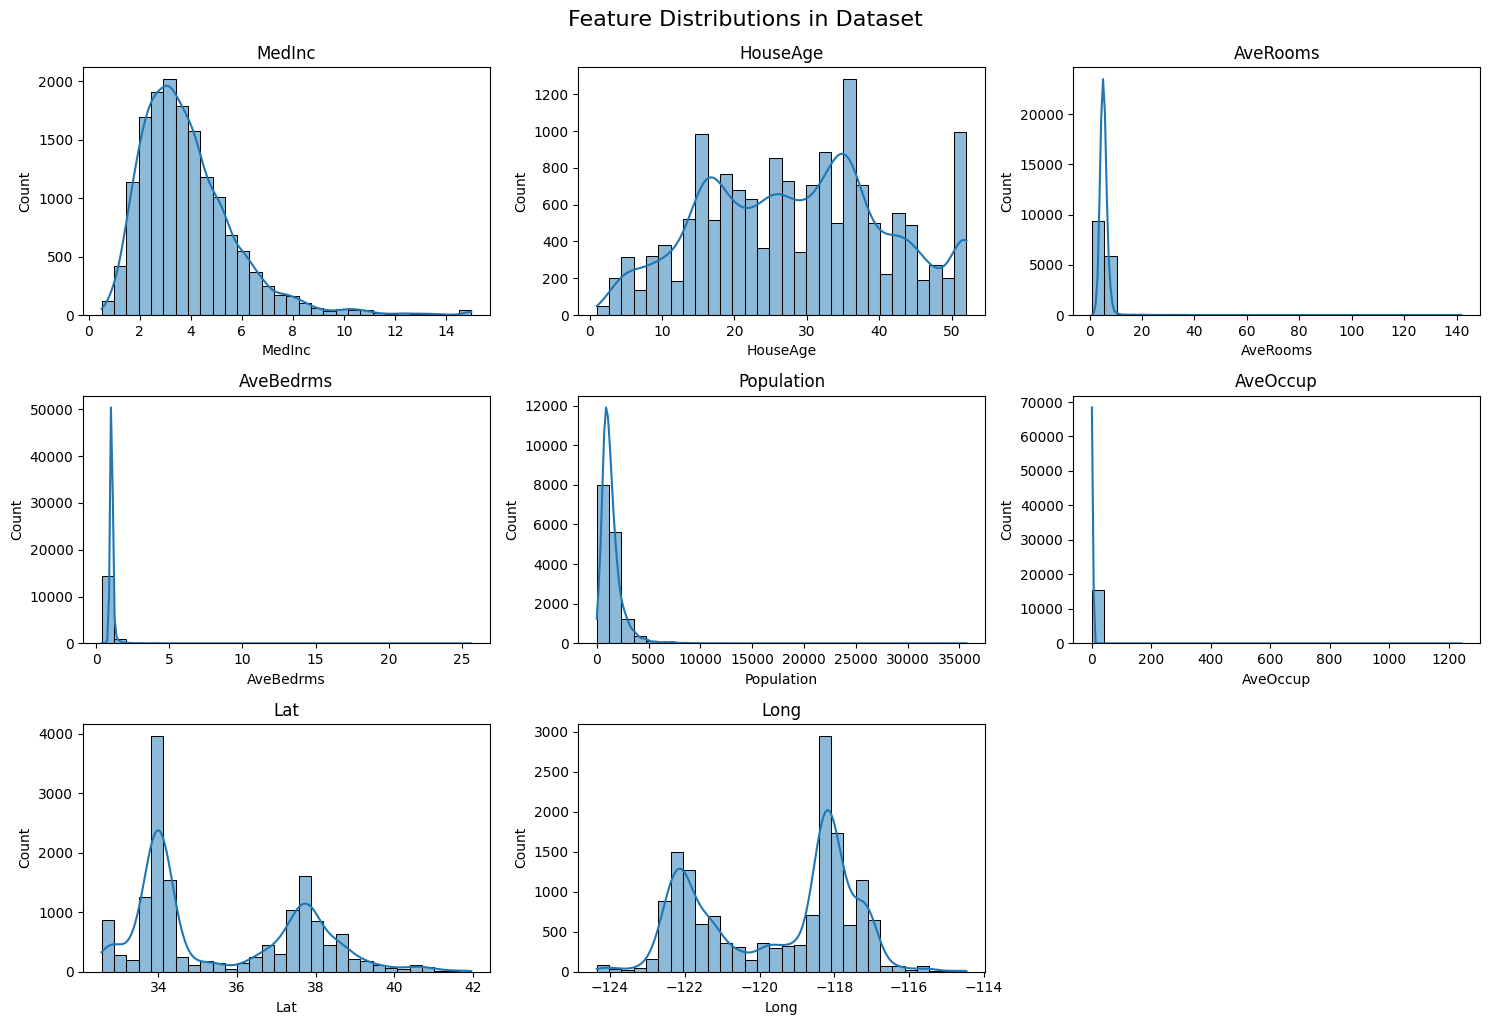

In [77]:
# Plotting feature distributions
def plot_feature_distributions(data, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

plot_feature_distributions(data.iloc[:, :-1], "Feature Distributions in Dataset")

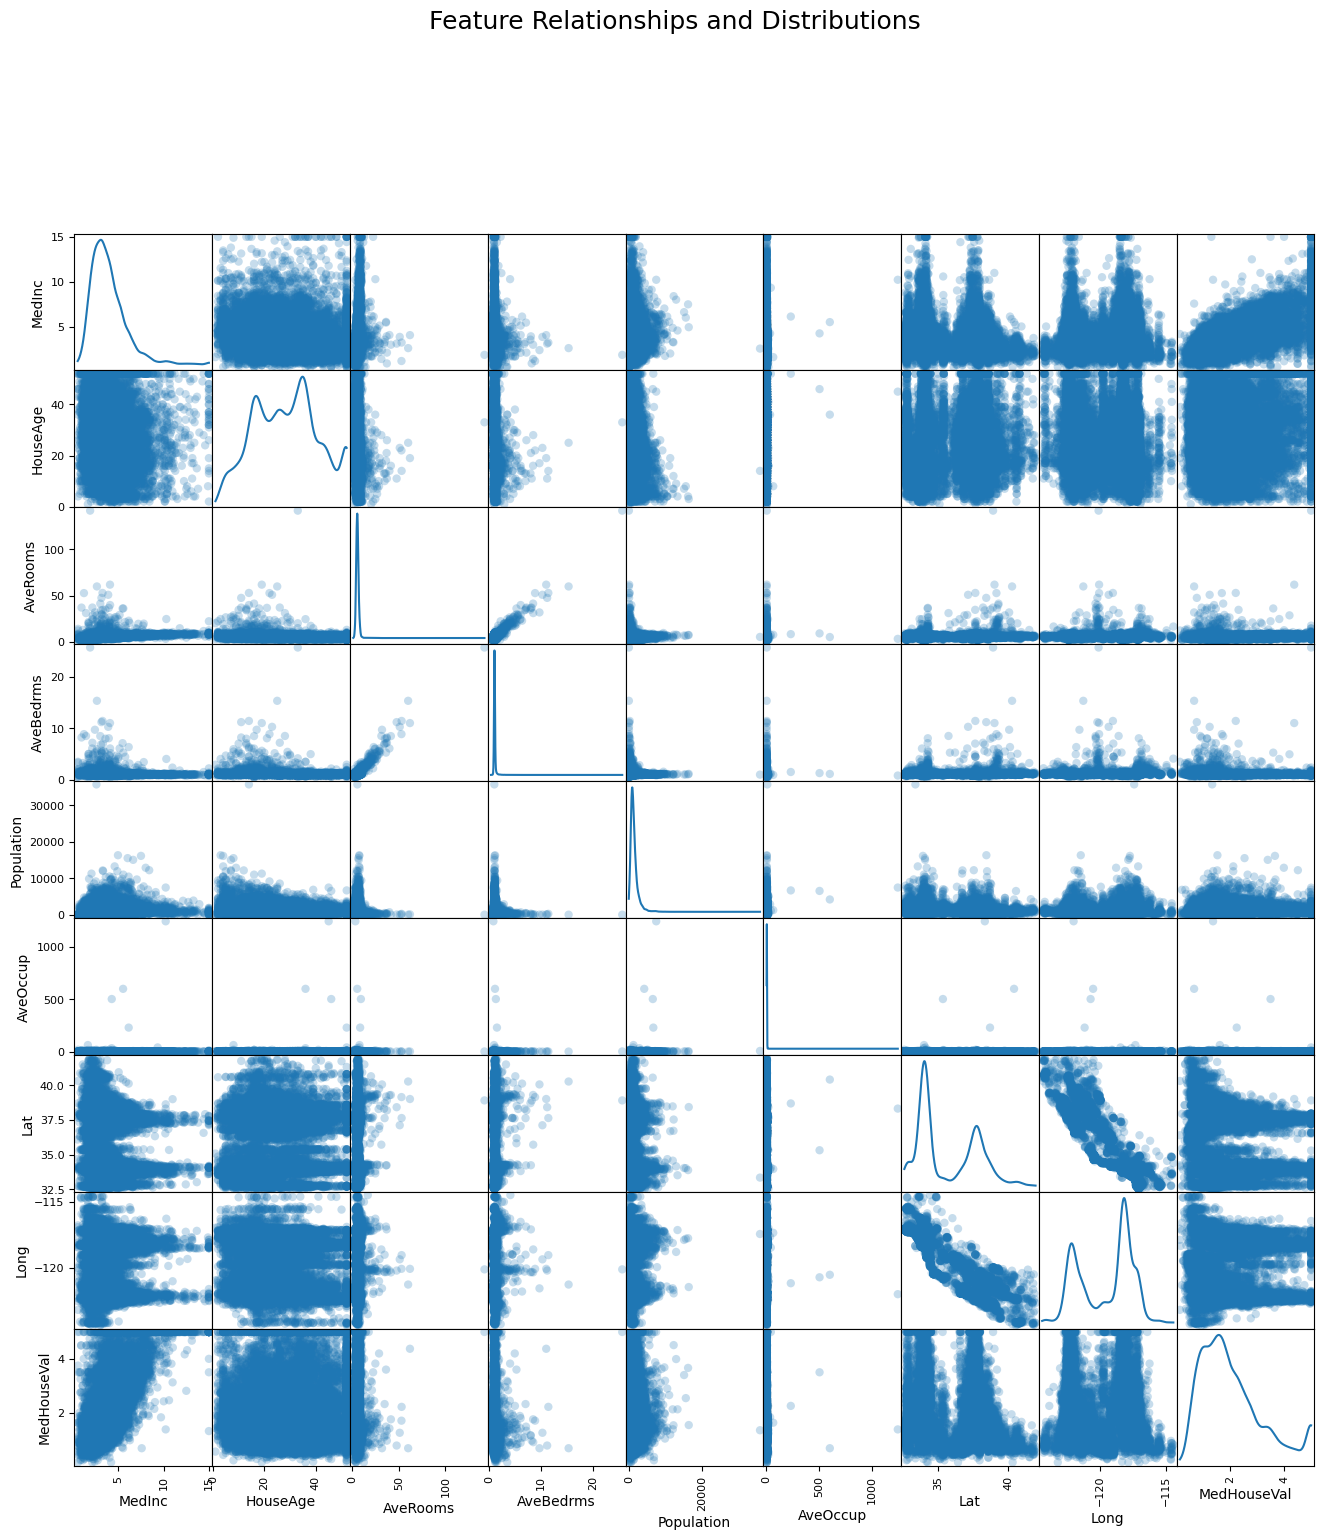

In [78]:
# Scatter plot to observe relationships between features and the target variable.
scatter_matrix = pd.plotting.scatter_matrix(
    data,
    alpha=0.25,
    figsize=(16, 16),
    diagonal="kde",
    marker="o"
)
plt.suptitle("Feature Relationships and Distributions", fontsize=18, y=1.02)
plt.show()

In [79]:
# Missing values count
print("Number of missing values")
print("------------------------------")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)

print("\nNumber of unique values")
print("------------------------------")
unique_values = data.nunique()
print(unique_values)

Number of missing values
------------------------------
             Missing Values  Percentage
MedInc                    0         0.0
HouseAge                  0         0.0
AveRooms                  0         0.0
AveBedrms                 0         0.0
Population                0         0.0
AveOccup                  0         0.0
Lat                       0         0.0
Long                      0         0.0
MedHouseVal               0         0.0

Number of unique values
------------------------------
MedInc         10372
HouseAge          52
AveRooms       14722
AveBedrms      11369
Population      3563
AveOccup       14356
Lat              840
Long             811
MedHouseVal     3602
dtype: int64


Correlation matrix for features
------------------------------
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.126398  0.338891  -0.070325    0.006030  0.022880   
HouseAge    -0.126398  1.000000 -0.164742  -0.089941   -0.296191  0.015903   
AveRooms     0.338891 -0.164742  1.000000   0.836048   -0.076527 -0.004385   
AveBedrms   -0.070325 -0.089941  0.836048   1.000000   -0.071595 -0.005768   
Population   0.006030 -0.296191 -0.076527  -0.071595    1.000000  0.074505   
AveOccup     0.022880  0.015903 -0.004385  -0.005768    0.074505  1.000000   
Lat         -0.077792  0.010531  0.113740   0.077687   -0.105442  0.006585   
Long        -0.017599 -0.109259 -0.033491   0.012110    0.098350 -0.001187   
MedHouseVal  0.689480  0.101697  0.163119  -0.049184   -0.023517 -0.021679   

                  Lat      Long  MedHouseVal  
MedInc      -0.077792 -0.017599     0.689480  
HouseAge     0.010531 -0.109259     0.101697  
AveRooms     0.

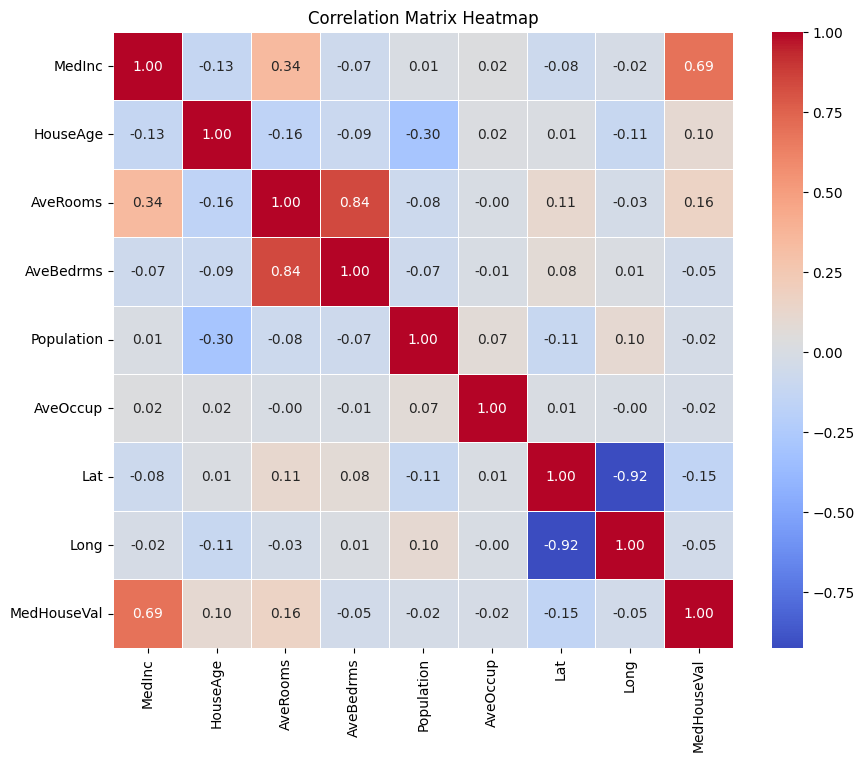

In [80]:
print("Correlation matrix for features")
print("------------------------------")
correlation_matrix = data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [82]:
print("Number of outliers:")
print("------------------------------")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5*IQR
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()
print(outliers_count)

Number of outliers:
------------------------------
MedInc          513
HouseAge          0
AveRooms        384
AveBedrms      1060
Population      908
AveOccup        532
Lat               0
Long              0
MedHouseVal     793
dtype: int64


In [68]:
# Preprocessing
# Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Split X_train to validation and train data
X_new_train, X_val, y_new_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=302)

## Task b)

In [69]:
# Convert to PyTorch tensors
X_new_train = torch.tensor(X_new_train).float()
y_new_train = torch.tensor(y_new_train).view(-1, 1).float()

X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).view(-1, 1).float()

X_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).view(-1, 1).float()

In [ ]:
def train_with_batch_size(model_fn, batch_size, num_epochs=200, patience=10):
    # Adjust learning rate based on batch size
    base_lr = 0.0001
    adjusted_lr = base_lr * (batch_size ** 0.5)

    train_dataset = TensorDataset(X_new_train, y_new_train)
    train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_val, y_val)
    val_iter = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    model = model_fn()
    criterion = nn.MSELoss()
    optimizer = torch.optim.RMSprop(model.parameters(), lr=adjusted_lr)
    
    train_losses = []
    val_losses = []
    
    # Early stopping variables
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False
    
    for epoch in range(num_epochs):
        if early_stop:
            print(f"Early stopping at epoch {epoch}")
            break

        running_train_loss = 0.0
        model.train()
        
        # Training loop
        for inputs, labels in train_iter:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        
        # Validation loop
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_iter:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
        
        # Calculate averate train and validation losses
        avg_train_loss = running_train_loss / len(train_iter)
        avg_val_loss = running_val_loss / len(val_iter)
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        # Check for early stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
        
        if epochs_no_improve >= patience:
            early_stop = True
    
    # Evaluate the model on test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_rmse = np.sqrt(mean_squared_error(test_outputs.numpy(), y_test.numpy()))

    return best_val_loss, test_rmse

In [ ]:
# We will use a fixed model to see if its loss changes with different batch sizes
def create_model():
    return nn.Sequential(
        nn.Linear(8, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

# Batch sizes to test
batch_sizes = [16, 32, 50, 64, 128, 256]
results = []

# Running experiments on every batch size
for batch_size in batch_sizes:
    print(f"Testing batch size: {batch_size}")
    val_loss, test_rmse = train_with_batch_size(create_model, batch_size)
    results.append({'Batch Size': batch_size, 'Validation Loss': val_loss, 'Test RMSE': test_rmse})
    print(f"Batch Size: {batch_size}, Validation Loss: {val_loss:.3f}, Test RMSE: {test_rmse:.3f}")

results_df = pd.DataFrame(results)
print(results_df)

best_result = results_df.loc[results_df['Validation Loss'].idxmin()]
print(f"Best Batch Size: {best_result['Batch Size']} with Validation Loss: {best_result['Validation Loss']:.3f} and Test RMSE: {best_result['Test RMSE']:.3f}")

Testing batch size: 16
Early stopping at epoch 47
Batch Size: 16, Validation Loss: 0.280, Test RMSE: 0.531
Testing batch size: 32
Early stopping at epoch 97
Batch Size: 32, Validation Loss: 0.277, Test RMSE: 0.530
Testing batch size: 50
Early stopping at epoch 74
Batch Size: 50, Validation Loss: 0.282, Test RMSE: 0.561
Testing batch size: 64
Early stopping at epoch 55
Batch Size: 64, Validation Loss: 0.288, Test RMSE: 0.535
Testing batch size: 128
Early stopping at epoch 76
Batch Size: 128, Validation Loss: 0.284, Test RMSE: 0.560
Testing batch size: 256
Early stopping at epoch 53
Batch Size: 256, Validation Loss: 0.306, Test RMSE: 0.603
   Batch Size  Validation Loss  Test RMSE
0          16         0.279530   0.530691
1          32         0.277187   0.529958
2          50         0.282249   0.561133
3          64         0.288165   0.535236
4         128         0.284204   0.560273
5         256         0.306276   0.603391
Best Batch Size: 32.0 with Validation Loss: 0.277 and Test R

### We will choose 32 as the batch size since it provided the lowest Validation Loss and Test RMSE.

In [ ]:
batch_size = 32
train_dataset = TensorDataset(X_new_train, y_new_train)
train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_iter = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Architectures to test
architectures = [
    [8, 50, 1],
    [8, 100, 50, 1],
    [8, 64, 32, 16, 1],
    [8, 100, 50, 10, 1],
    [8, 128, 64, 32, 1],
    [8, 256, 128, 64, 32, 1]
]

def create_model(architecture):
    layers = []
    for i in range(len(architecture) - 1):
        layers.append(nn.Linear(architecture[i], architecture[i + 1]))
        if i < len(architecture) - 2:  # Add ReLU for all layers except the last
            layers.append(nn.ReLU())
    return nn.Sequential(*layers)

# Loss function
criterion = nn.MSELoss()

# Training function with validation loss tracking
def train(model_inp, num_epochs=200):
    adjusted_lr = 0.0001 * (batch_size ** 0.5)
    optimizer = torch.optim.RMSprop(model_inp.parameters(), lr=adjusted_lr)
    
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        model_inp.train()
        
        # Training loop
        for inputs, labels in train_iter:
            outputs = model_inp(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        
        # Validation loop
        model_inp.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_iter:
                outputs = model_inp(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
        
        # Calculate the average losses
        avg_train_loss = running_train_loss / len(train_iter)
        avg_val_loss = running_val_loss / len(val_iter)
        
        # Store the losses
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)

        if epoch % 20 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}] Train Loss: {avg_train_loss:.3f}, Validation Loss: {avg_val_loss:.3f}")

    return train_losses, val_losses

# Save the model to the 'models' folder
def save_model(model_obj, model_path):
    torch.save(model_obj.state_dict(), model_path)

model_dir = "models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

all_losses = {}
for idx, architecture in enumerate(architectures):
    print(f"\nTraining model {idx + 1} with architecture: {architecture}")

    # Create model
    model = create_model(architecture)
    model.train()
    
    # Train the model
    model_path = os.path.join(model_dir, f"model_architecture_{idx + 1}.pth")
    train_losses, val_losses = train(model, num_epochs=200)
    
    # Save the model
    save_model(model, model_path)
    
    # Store the losses
    all_losses[f"Model_{idx + 1}"] = {
        'train_losses': train_losses,
        'val_losses': val_losses
    }

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        err = np.sqrt(mean_squared_error(outputs.numpy(), y_test.numpy()))
        print(f"Model {idx + 1} RMSE on test set: {err:.3f}")

loss_summary = pd.DataFrame({
    f"Model_{idx + 1} Train Loss": losses['train_losses']
    for idx, losses in enumerate(all_losses.values())
})
loss_summary["Epoch"] = range(1, len(train_losses) + 1)

print("\nTraining Loss Summary:")
print(loss_summary)


Training model 1 with architecture: [8, 50, 1]
Epoch [1/200] Train Loss: 1.455, Validation Loss: 0.723
Epoch [21/200] Train Loss: 0.346, Validation Loss: 0.376
Epoch [41/200] Train Loss: 0.312, Validation Loss: 0.339
Epoch [61/200] Train Loss: 0.301, Validation Loss: 0.327
Epoch [81/200] Train Loss: 0.293, Validation Loss: 0.326
Epoch [101/200] Train Loss: 0.292, Validation Loss: 0.317
Epoch [121/200] Train Loss: 0.285, Validation Loss: 0.321
Epoch [141/200] Train Loss: 0.285, Validation Loss: 0.313
Epoch [161/200] Train Loss: 0.283, Validation Loss: 0.315
Epoch [181/200] Train Loss: 0.279, Validation Loss: 0.321
Model 1 RMSE on test set: 0.550

Training model 2 with architecture: [8, 100, 50, 1]
Epoch [1/200] Train Loss: 0.911, Validation Loss: 0.532
Epoch [21/200] Train Loss: 0.326, Validation Loss: 0.350
Epoch [41/200] Train Loss: 0.282, Validation Loss: 0.316
Epoch [61/200] Train Loss: 0.264, Validation Loss: 0.315
Epoch [81/200] Train Loss: 0.253, Validation Loss: 0.296
Epoch [10

### Chosen Architecture: `[8, 64, 32, 16, 1]`
This architecture represents a feedforward neural network with the following layers:

- **Input Layer:** 8 neurons
- **Hidden Layer 1:** 64 neurons
- **Hidden Layer 2:** 32 neurons
- **Hidden Layer 3:** 16 neurons
- **Output Layer:** 1 neuron

This structure defines the number of neurons in each layer, from the input to the output, with three hidden layers in between.

It was chosen due to the lowest Root Mean Squared Error (RMSE) on test set: 0.511.

[Click here to view the train and validation loss values for this architecture: `train_val_losses.txt` file](./train_val_losses.txt)